* Họ và tên: Hồ Thịnh
* MSSV: 19522274
* Lab03: Differential Evolution (DE) & Cross Entropy Method (CEM)

#Import thư viện & Khai báo hàm

In [1]:
import numpy as np
from IPython import display
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import random
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from time import sleep
import plotly.graph_objects as go

Khai báo hàm

In [2]:
# Sphere
def Sphere(x):
    f = 0
    for i in x:
        f += i**2
    return f

# Zakharov
def Zakharov(x):
  y = x
  f1 = 0
  f2 = 0
  for i in range(len(x)):
    f1 += x[i]**2
    f2 += 0.5*x[i]*y[i]

  return f1 + f2**2 + f2**4

# Rosenbrock
def Rosenbrock(x):
    f = 0
    for i in range(len(x) - 1):
        f += (100*((x[i + 1] - x[i]**2)**2) + (1 -x[i])**2)
    return f

# Michalewicz
def Michalewicz(x):
  m = 10
  y = x
  f = 0

  for i in range(len(x)):
    f+= np.sin(x[i])* (np.sin(y[i]*(x[i]**2)/np.pi))**(2*m)
    
  return f

# Ackley
def Ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    f1 = 0
    f2 = 0
    for i in range(len(x)):
        f1 += x[i] ** 2
        f2 += np.cos(c * x[i])
    p1 = -a * np.exp(-b * np.sqrt(f1 / len(x)))
    p2 = -np.exp(f2 / len(x))

    return p1 + p2 + a + np.exp(1)

#DE
def DE(fobj, dimension, bounds, F_scale, cross_prob, popsize, max_evals):

    lower_bound, upper_bound = np.asarray(bounds).T

    eps = 0.00001

    diff = np.fabs(lower_bound - upper_bound)

    pop = lower_bound + diff * np.random.rand(popsize, dimension)

    fitness = np.asarray([fobj(ind) for ind in pop])
    num_eval = 1
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], num_eval))
    all_pops.append(np.copy(pop))
    generation_count = 0
    
    while True:
        if num_eval > max_evals:
            break
        for i in range(popsize):

            idxes = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxes, 3, replace=False)]
            mutant = np.clip(F_scale*(b - c) + a, lower_bound, upper_bound)

            cross_points = np.random.rand(dimension) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimension)] = True
            
            trial = np.where(cross_points, mutant, pop[i])

            f = fobj(trial)
            num_eval += 1

            if f < fitness[i]:
                pop[i] = trial
                fitness[i] = f 
                if f < fitness[best_idx]:
                    best = trial
                    best_idx = i

        results.append((np.copy(best), fitness[best_idx], num_eval))
        all_pops.append(np.copy(pop))

        if fobj(best) < eps:
            num_eval += 1
            break

        generation_count += 1

    return results, all_pops, generation_count


#CEM bản gốc
def CEM(fobj, dimensions, bounds, popsize, num_elite, sigma_init, seed_number):
    np.random.seed(seed_number)
    eps = 1e-4
    lower_bound, upper_bound = np.asarray(bounds).T
    sigma = sigma_init * np.eye(dimensions)

    diff = np.fabs(lower_bound - upper_bound)
    n_evals = 0
    num_evals = [0]
    # mu = np.random.rand(dimensions) - (upper_bound + 1)
    mu = lower_bound + diff * np.random.rand(dimensions)
    generation_count = 0
    all_mu = []
    all_sigma = []
    all_offspring = []
    all_elite = []
    all_fitness = []
    
    
    while True:
    # for i in range(10000):
        if n_evals > max_evals:
            break
        all_mu.append(mu)
        all_sigma.append(sigma)

        x = np.random.multivariate_normal(mu, sigma, popsize)
        # print(np.sum(x))
        all_offspring.append(x)
        fitness = np.array([fobj(x[i]) for i in range(popsize)])
        n_evals += popsize
        best_fitness = max(fitness) 
        all_fitness.append(best_fitness)
        # print(x)
        if best_fitness < eps or np.sum(x) > 1e150 or np.sum(x) < -1e150:
            break

        elite_idx = fitness.argsort()[:num_elite]
        all_elite.append(elite_idx)
        mu = np.mean(x[elite_idx], axis=0)

        sigma = np.zeros_like(sigma)
        for i in range(num_elite):
            z = x[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            # print(num_evals)
            # sigma += tf.matmul(z.T, z)
            # sigma += (z.T * z)
            sigma += (z.T @ z)

        sigma *= (1/num_elite)
        generation_count += 1
        num_evals.append(n_evals)

    all_mu.append(mu)
    best_results = mu.copy()
    best_fitness = fobj(mu)
    return all_mu, all_fitness, num_evals, generation_count

In [3]:
F_scale = 0.8
cross_prob = 0.7
popsizes = [32, 64, 128, 256, 512, 1024]

#1. Chạy thực nghiệm thuật toán

##Differential Evolution (DE)

Hàm Sphere

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
lower_bound = -6
upper_bound = 6

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([-0.00240302,  0.001345  ]), 7.583530264747691e-06, 865)
(array([-0.00107649, -0.00041664]), 1.3324153218178985e-06, 897)
(array([-0.00213739, -0.00207959]), 8.893112033792546e-06, 801)
(array([ 0.0024448 , -0.00040465]), 6.140803452724705e-06, 897)
(array([-0.00092162, -0.00174715]), 3.901899233571975e-06, 993)
(array([-0.00172321,  0.00101482]), 3.999323254872975e-06, 961)
(array([-0.00275432, -0.00135795]), 9.430290509068442e-06, 769)
(array([-0.00082158,  0.00200871]), 4.7098962529428366e-06, 865)
(array([ 0.00109977, -0.00068882]), 1.6839665100085162e-06, 1057)
(array([0.00029746, 0.00195004]), 3.891148869028713e-06, 897)
Giá trị trung bình (mean) của Sphere (d=2, n=32): 5.15663857025763e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=32): 2.654856790236651e-06
========================== popsize 64 ==============================
(array([ 0.00101632, -0.00087729]), 1.8025453758547817e-06, 1537)
(array([-0.001488

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
lower_bound = -6
upper_bound = 6

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([-0.00053765, -0.00064307,  0.00038163, -0.00129172,  0.00191151,
        0.00011105, -0.00117152,  0.00112422, -0.00024092, -0.0007645 ]), 9.461803207069032e-06, 10785)
(array([ 5.68999424e-05, -1.96959494e-03,  1.27038804e-03,  3.07444467e-04,
        1.13781315e-03, -2.00899713e-04, -8.21204861e-04, -5.77268126e-04,
        1.06601728e-03, -6.57041538e-04]), 9.501641508887831e-06, 10593)
(array([ 1.52239199e-03,  1.55961354e-03,  5.11097212e-04,  3.03532473e-04,
        1.99978257e-05, -1.41022969e-04,  3.89440757e-04, -1.65867525e-03,
       -4.56464012e-05, -5.08264897e-04]), 8.286995974137234e-06, 10689)
(array([ 6.12612347e-05, -5.05667896e-04, -1.64913328e-03,  2.71638101e-04,
        2.58526870e-05, -1.01509829e-03, -2.19445458e-04,  9.21907727e-04,
        7.04080430e-04,  1.27793621e-03]), 7.110894047455482e-06, 10977)
(array([ 0.00063744, -0.00090367, -0.00015897, -0.00095502,  0.00026506,
        0

Hàm Zakharov

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
lower_bound = -5
upper_bound = 10

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([-0.00179163,  0.00012134]), 3.224665707145627e-06, 673)
(array([-0.00072249, -0.0013899 ]), 2.4538225726860194e-06, 737)
(array([-0.0004403 ,  0.00074395]), 7.473286293991468e-07, 1089)
(array([-0.00050773,  0.00034447]), 3.7644834901182946e-07, 769)
(array([-0.00144968, -0.00225302]), 7.177705641603521e-06, 673)
(array([0.00081522, 0.00203451]), 4.803822446336991e-06, 865)
(array([-0.00174107, -0.00017202]), 3.0609126400949857e-06, 801)
(array([-0.00035562,  0.00258883]), 6.828535560226243e-06, 961)
(array([-2.24620736e-03, -4.24016469e-05]), 5.047251755482768e-06, 865)
(array([-0.00125464, -0.00265906]), 8.64475128371544e-06, 897)
Giá trị trung bình (mean) của Zakharov (d=2, n=32): 4.236524458570258e-06
Độ lệch chuẩn (std) của Zakharov (d=2, n=32): 2.6160898341178392e-06
========================== popsize 64 ==============================
(array([-0.00149261, -0.00178282]), 5.406341369645988e-06, 1473)
(arra

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
lower_bound = -5
upper_bound = 10

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([ 0.00160261, -0.00024269, -0.0001108 , -0.00017015,  0.00024825,
       -0.00079849, -0.00063792, -0.00109245, -0.00104337,  0.00010172]), 6.067059279291003e-06, 10881)
(array([ 0.00093366,  0.00161395,  0.00040793, -0.00047586,  0.00020258,
        0.00027706, -0.0002837 ,  0.00116526,  0.00039701,  0.00010924]), 5.595050487789104e-06, 10209)
(array([-0.00011371, -0.00110486,  0.00051821,  0.0003677 , -0.00129314,
       -0.00067347,  0.00034354, -0.00114467, -0.00099876,  0.00066727]), 6.634245293812892e-06, 10177)
(array([ 0.00147912,  0.0003567 , -0.00019771,  0.0007903 , -0.00011697,
       -0.00014446, -0.00138188, -0.00048718, -0.00039962,  0.00011482]), 5.333051101952396e-06, 11233)
(array([ 9.43320887e-04, -3.45098341e-04, -1.29475757e-04,  4.92394262e-04,
        7.29168721e-04,  1.54558515e-03, -1.29318375e-03,  6.18369815e-05,
       -8.80091439e-04,  1.55605285e-03]), 9.060713676160549e-06, 11297)

Hàm Rosenbrock

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
lower_bound = -3
upper_bound = 3

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([1.00055502, 1.00113969]), 3.9408314100560794e-07, 1889)
(array([1.00108202, 1.00212452]), 1.336417504095293e-06, 2433)
(array([0.9985254 , 0.99725997]), 6.459073805952525e-06, 2273)
(array([0.99842061, 0.99679532]), 2.7286779512737894e-06, 2337)
(array([0.99960315, 0.99939762]), 3.8113904425240257e-06, 1921)
(array([1.00209576, 1.0040132 ]), 7.730530740121852e-06, 2657)
(array([1.0013428 , 1.00258772]), 2.7966584403011006e-06, 2529)
(array([1.00056927, 1.00142031]), 8.245754398248101e-06, 2849)
(array([1.00142696, 1.00287048]), 2.057296931474237e-06, 2305)
(array([1.00080908, 1.0017743 ]), 3.0719859251770185e-06, 2689)
Giá trị trung bình (mean) của Rosenbrock (d=2, n=32): 3.8631869280173554e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32): 2.5619452277078818e-06
========================== popsize 64 ==============================
(array([1.00000134, 1.00019738]), 3.7909706776065464e-06, 4353)
(array([0.99775

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
lower_bound = -3
upper_bound = 3

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([1.00001745, 0.99996348, 1.00004702, 1.00003517, 0.99999529,
       1.00004837, 1.00006058, 1.00007507, 1.00031897, 1.00047171]), 9.273326473770351e-06, 65601)
(array([0.99998676, 1.00004834, 0.9999907 , 0.99994585, 0.99997721,
       0.99992782, 0.99987726, 0.99970842, 0.99941063, 0.99867964]), 5.349416411476567e-06, 68321)
(array([1.00009748, 1.00003164, 0.99998142, 0.99997264, 0.99992109,
       0.99992301, 0.99995647, 0.99996346, 0.99990828, 0.99965829]), 8.10899841889986e-06, 71617)
(array([1.00007961, 1.00006548, 1.00005679, 1.00004071, 1.0000194 ,
       0.99993722, 1.00000322, 1.00010149, 1.00022061, 1.00049158]), 6.301631809291931e-06, 62049)
(array([0.99996791, 1.0001018 , 1.00009233, 1.00001969, 0.99998711,
       0.99995894, 0.999949  , 0.99976096, 0.99946613, 0.9989032 ]), 9.751819324090315e-06, 68833)
(array([0.99999322, 1.00004491, 1.0000604 , 1.00015125, 1.00005951,
       1.00007343, 1.00009675

Hàm Michalewicz

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
lower_bound = 0
upper_bound = np.pi

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([0., 0.]), 0.0, 33)
(array([0., 0.]), 0.0, 33)
(array([0., 0.]), 0.0, 33)
(array([0.        , 0.03703342]), 5.5096559399699885e-98, 33)
(array([0.03372858, 2.70301725]), 3.595459151117186e-51, 33)
(array([0., 0.]), 0.0, 33)
(array([0.        , 0.29977086]), 1.3630966469294436e-42, 33)
(array([0.36803511, 0.        ]), 3.68157609505793e-37, 33)
(array([0.        , 0.00768387]), 1.1950504829505892e-139, 33)
(array([0.29707769, 0.        ]), 7.86261840091546e-43, 33)
Giá trị trung bình (mean) của Michalewicz (d=2, n=32): 3.681597588642836e-38
Độ lệch chuẩn (std) của Michalewicz (d=2, n=32): 1.104472112073435e-37
========================== popsize 64 ==============================
(array([0.07973178, 0.15594981]), 6.719139472608113e-60, 65)
(array([0., 0.]), 0.0, 65)
(array([0.        , 0.25230403]), 3.7129802056076005e-47, 65)
(array([0., 0.]), 0.0, 65)
(array([0.22801998, 0.        ]), 7.7545862533278735e-50, 65)

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
lower_bound = 0
upper_bound = np.pi

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([0.        , 0.        , 2.02423906, 0.        , 1.1302453 ,
       3.14159265, 1.21316443, 0.        , 0.        , 0.96125255]), 4.367926443699324e-06, 97)
(array([0.48198104, 0.        , 3.14159265, 3.14159265, 3.14159265,
       0.67495781, 3.14159265, 0.84232402, 3.14159265, 2.07046493]), 6.334635198163925e-11, 33)
(array([0.        , 0.        , 3.14159265, 0.66608619, 3.14159265,
       0.93463237, 0.66984618, 0.91099878, 3.14159265, 2.79052202]), 9.63862354027855e-06, 65)
(array([1.10905263, 0.67148591, 3.08594464, 0.28856638, 1.17303478,
       0.06436753, 0.08466336, 2.08074849, 0.        , 0.        ]), 6.504376943925682e-07, 97)
(array([3.0589508 , 0.70821207, 0.        , 0.61899053, 0.        ,
       0.        , 2.02177231, 3.14159265, 3.09601531, 3.14159265]), 5.520146157171705e-07, 65)
(array([0.        , 0.        , 0.78179775, 0.57974551, 2.74171114,
       2.12178919, 0.        , 0.60518509, 0

Hàm Ackley

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
lower_bound = -33
upper_bound = 33

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([ -4.9302241, -33.       ]), 19.94701274558479, 100001)
(array([-33., -33.]), 19.895436160982488, 100001)
(array([-33., -33.]), 19.972792639249043, 100001)
(array([-33., -33.]), 19.972792639249043, 100001)
(array([8.69004204e-07, 1.11200651e-06]), 3.991771255318355e-06, 2913)
(array([2.58495994e-06, 2.39715251e-06]), 9.971632970451338e-06, 2369)
(array([-33., -33.]), 19.972792639249043, 100001)
(array([-7.58769400e-07,  9.59907433e-07]), 3.4608528136637062e-06, 2689)
(array([3.26905914e-07, 2.42495480e-07]), 1.1512525515122718e-06, 2817)
(array([433., 433.]), 19.972792639249043, 100001)
Giá trị trung bình (mean) của Ackley (d=2, n=32): 11.9733638039073
Độ lệch chuẩn (std) của Ackley (d=2, n=32): 9.776231753303353
========================== popsize 64 ==============================
(array([-5.16925022e-07,  3.26865744e-06]), 9.360348425691e-06, 5249)
(array([-1.59998086e-06, -2.77853136e-06]), 9.068978297666064e

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
lower_bound = -33
upper_bound = 33

for popsize in popsizes:
  all_results = []
  for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

  print(f"========================== popsize {popsize} ==============================")
  print(*all_results, sep ="\n")
  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]), 19.972792639249043, 1000001)
(array([433., -33., 433., -33., 433., 433., -33., -33., 433., 433.]), 20.0, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]), 19.972792639249043, 1000001)
(array([-33., -33., -33., -33., -33., 433., -33., -33., -33., -33.]), 19.999999999987384, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., 433.]), 19.972792639249043, 1000001)
(array([433., 433., 433., -33., -33., 433., -33., 433., -33., -33.]), 20.0, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]), 19.972792639249043, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., 433.]), 19.999999999987384, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]), 19.972792639249043, 1000001)
(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.])

##Cross-Entropy Method (CEM)

Hàm Sphere


In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 1.50180803 -1.50180804] 4.510854759223712 100032
[ 0.1401197  -1.99334089] 3.9930414236791116 100032
[ 2.37859155 -2.37859156] 11.315395558668381 100032
[ 0.88220515 -0.88220515] 1.5565718611205015 100032
[ 3.63402267 -3.63402269] 26.41224166529973 100032
[ 0.01720079 -0.01720079] 0.000591734071624948 100032
[-4.25600667  4.25600667] 36.22718555373442 100032
[ 2.23890919 -2.23890919] 10.02542873071089 100032
[-0.25066954  0.25066954] 0.1256704362974756 100032
[-0.77907485  0.77907486] 1.2139152590267486 100032
Giá trị trung bình (mean) của Sphere (d=2, n=32): 9.53808969818326
Độ lệch chuẩn (std) của Sphere (d=2, n=32): 11.700494946806161
========================== popsize 64 ==============================
[ 0.32216632 -0.32216632] 0.20758228050887556 100032
[ 0.56102402 -0.56102401] 0.6294958905334931 100032
[ 0.92275389 -0.92275389] 1.7029494855527214 100032
[ 1.26319301 -1.26319301] 3.191313171027997 100032
[-1.29

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 1.99738378 -2.91157874 -2.80400347 -0.43056313  0.81654785 -3.0268453
 -3.17490194  0.37494254  3.8766132   5.28240512] 83.49571368011057 1000032
[-4.20677279 -3.93882606 -0.59316884 -1.18738829  3.07772092 -1.86572885
 -0.31997983  3.49508954 -0.04829914  5.58735335] 91.46522668150351 1000032
[ 2.0812469  -3.46988498 -0.84460089  0.06655845  1.57595129 -2.25989945
  2.26708062 -1.3464253   0.49965629  1.43031702] 33.928217885257055 1000032
[ 3.49443028  1.48322679 -3.24692535 -0.17331835 -1.60541737 -3.66500853
 -5.15079924  2.93528498  2.66987227  3.25865457] 93.88689899458161 1000032
[ 3.47471546 -4.7832037  -0.13179723 -3.05304301  0.46036845  1.74839501
  0.81273928 -1.46784029  1.17025112  1.76941487] 54.87536835511386 1000032
[-1.31937019 -1.27441741  5.75034698  0.92491395 -0.05635342 -0.98564356
 -0.45613309  0.109487   -3.02976868  0.33693838] 47.77457307447066 1000032
[-5.5935783   2.8242987   2.08516126 

Hàm Zakharov

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 2.05959587 -2.05959589] 350.2624321174379 100032
[ 0.77184521 -1.73458671] 17.40331490672918 100032
[ 3.46971499 -3.469715  ] 21175.35496585652 100032
[ 1.64735428 -1.64735428] 67.0291844665727 100032
[ 5.03144659 -5.0314466 ] 411408.75071996124 100032
[-0.09980662  0.09980662] 0.020021959676155682 100032
[-5.73033866  5.73033868] 1163776.0538929414 100032
[ 2.69319071 -2.69319071] 2834.9303167119137 100032
[-0.49060571  0.49060571] 0.5426777999962804 100032
[-0.62688129  0.62688129] 0.964243385349857 100032
Giá trị trung bình (mean) của Zakharov (d=2, n=32): 159963.13117701068
Độ lệch chuẩn (std) của Zakharov (d=2, n=32): 356118.85521447245
========================== popsize 64 ==============================
[ 0.83097931 -0.83097931] 2.085244233703706 100032
[ 0.82364614 -0.82364614] 2.0288026166402258 100032
[ 0.99665907 -0.99665907] 3.946944714302452 100032
[ 1.54107359 -1.54107359] 42.20171295053712 100032
[-2.3

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 2.79067443 -3.8465114  -3.47765456 -0.09128257  1.44962589 -4.10739154
 -4.5521215   0.80799613  4.58699399  6.43967122] 22372929.619717516 1000032
[-5.49750979 -4.85178219 -0.99188958 -1.66374209  3.80170647 -2.50045682
 -0.06281907  4.85400467 -0.50931136  7.42179992] 38103024.82919572 1000032
[ 3.03190728 -5.06282179 -1.2901515   0.07040695  2.30562575 -3.66305743
  2.89295413 -1.02169822  0.69477745  2.04205728] 1442243.1890650184 1000032
[ 4.62307532  1.63070014 -4.2145857  -0.18408557 -2.08670844 -4.48937978
 -6.64104224  3.68233459  3.37366051  4.30603114] 35089804.4444357 1000032
[ 4.95908724 -6.64161717  0.24134217 -4.3497044   0.00925685  3.2447199
  0.35346451 -1.95621088  1.66522305  2.47443874] 9510845.579764782 1000032
[-1.92811976 -1.32530333  7.29826812  1.20748449 -0.128002   -1.45378687
 -0.5040027  -0.04022232 -3.77118026  0.64486474] 2223847.784304514 1000032
[-7.39603381  4.33756757  3.12023283 

Hàm Rosenbrock

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 0.50739148 -0.07578086] 11.346684890674062 100032
[ 0.50100134 -2.2406484 ] 621.0813429535068 100032
[ 0.50273148 -0.65751475] 83.10345394316619 100032
[0.78308635 0.60939301] 0.04851936151770865 100032
[ 0.500884   -2.57215059] 797.2019896048629 100032
[-0.55654905  0.31711304] 2.4282710192068655 100032
[-1.76421369  3.11855409] 7.644603391744162 100032
[ 0.50165013 -1.25838161] 228.26875870740687 100032
[ 0.50714185 -0.08785662] 12.148822743944082 100032
[1.47289396 2.17184696] 0.22421935444807273 100032
Giá trị trung bình (mean) của Rosenbrock (d=2, n=32): 176.34966659704776
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32): 277.42287905051523
========================== popsize 64 ==============================
[0.98573047 0.97151766] 0.00020577718914097107 100032
[1.27422827 1.62542866] 0.07551478055491431 100032
[0.51784787 0.13309366] 2.056935447421044 100032
[1.03761718 1.07699926] 0.0014272916784108533 100032
[

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 1.1492     -1.11706169 -0.31657686  0.20511509  0.03234604 -1.21825444
 -0.63284464  0.54519591  2.47124464  3.54731946] 2584.638356448865 1000032
[-1.23463216 -1.1105881  -0.04923648 -0.89672643  1.60334964 -0.38484034
  0.25215653  1.30373583  0.14809026  3.29894232] 3364.377900091713 1000032
[ 0.7645613  -1.56817737 -0.30517709  0.54077305  0.88321554 -0.48019295
  1.67763254 -1.22889825  0.46306002  0.2155529 ] 3411.754545201489 1000032
[ 2.28822879  1.77916356 -1.10614266  0.16066971 -1.19816759 -0.60562223
 -2.00565366  1.28623402  2.25344758  2.83989807] 5572.989384889721 1000032
[ 1.61488396e+00 -1.51044105e+00  1.42632187e-03 -9.02159030e-01
  5.02906789e-01  7.57267665e-01  1.01695475e+00 -9.61838719e-01
  9.73784232e-01  1.09945447e+00] 2768.432122613714 1000032
[-1.08598478 -1.06445075  2.65627052  0.50704266  0.56352031 -0.94113548
 -0.20782403 -0.25762609 -1.78310785 -1.10407152] 7523.809230978259 1000

Hàm Michalewicz

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sin


========================== popsize 32 ==============================
[-2.3697098e+101 -2.3697098e+101] 0.6839011436490966 100032
[-0.63282089 -2.14316826] -4.7132314353390974e-23 160
[-3.03165791e+101 -3.03165791e+101] 1.1498830248552545 100032
[5.32271833 4.11525039] 2.2001812760877993e-05 384
[ 4.31628015 -0.78467806] 1.3162223841673904e-08 1184
[-1.02999999e+102 -1.02999999e+102] 1.3351023564221556 100032
[-2.36321188e+101 -2.36321188e+101] 0.8618658947437958 100032
[5.31436554e+101 5.31436554e+101] 0.9232507032101891 100032
[-1.98010719e+102 -1.98010719e+102] 0.5795883149984365 100032
[-1.18310833e+102 -1.18310833e+102] 1.3883147688150024 100032
Giá trị trung bình (mean) của Michalewicz (d=2, n=32): 0.6921928221668915
Độ lệch chuẩn (std) của Michalewicz (d=2, n=32): 0.5137787666732091
========================== popsize 64 ==============================
[1.62230059e+101 1.62230059e+101] 1.2091330619774636 100032
[-5.38062334e+101 -5.38062334e+101] 0.9147278085744316 100032
[-8.84549

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sin


========================== popsize 32 ==============================
[-6.32205639e+146 -6.32205456e+146 -6.32205456e+146 -6.32205456e+146
 -6.32205456e+146 -6.32205456e+146 -6.32205456e+146 -6.32205456e+146
 -6.32205456e+146 -6.32205456e+146] nan 12224
[-3.07754289e+147 -3.07754292e+147 -3.07754292e+147 -3.07754292e+147
 -3.07754292e+147 -3.07754292e+147 -3.07754292e+147 -3.07754292e+147
 -3.07754292e+147 -3.07754292e+147] nan 11904
[2.58827354e+146 2.58827581e+146 2.58827581e+146 2.58827581e+146
 2.58827581e+146 2.58827581e+146 2.58827581e+146 2.58827581e+146
 2.58827581e+146 2.58827581e+146] nan 12768
[-3.65766656e+148 -3.65766662e+148 -3.65766662e+148 -3.65766662e+148
 -3.65766662e+148 -3.65766662e+148 -3.65766662e+148 -3.65766662e+148
 -3.65766662e+148 -3.65766662e+148] nan 10944
[9.31077828e+147 9.31077802e+147 9.31077802e+147 9.31077802e+147
 9.31077802e+147 9.31077802e+147 9.31077802e+147 9.31077802e+147
 9.31077802e+147 9.31077802e+147] nan 12672
[-3.53353893e+147 -3.53353869e+

Hàm Ackley

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[9.86010539e+147 9.86010539e+147] 22.34919078849446 53440
[ 1.01416555 -1.99725853] 5.435799379598851 100032
[-1.36061096e+148 -1.36061096e+148] 22.33878896668095 48128
[11.57221287 -9.50849403] 21.123713343662697 100032
[-1.86045869e+148 -1.86045869e+148] 22.346592014827166 49024
[-3.01671142  3.01671142] 9.075321607228743 100032
[-1.07953636e+148 -1.07953636e+148] 22.3498246402924 46208
[-1.34472044e+148 -1.34472044e+148] 22.327472459233473 51072
[-7.44207186  8.3404643 ] 19.584641074546138 100032
[-5.12914645  5.12914645] 13.55767982640346 100032
Giá trị trung bình (mean) của Ackley (d=2, n=32): 18.048902410096836
Độ lệch chuẩn (std) của Ackley (d=2, n=32): 6.031329809771703
========================== popsize 64 ==============================
[ 5.81959092 -5.81959092] 14.945851374020233 100032
[ 6.96778461 -5.96941396] 14.588343635438147 100032
[ 7.94140377 -6.94268684] 15.67299319331207 100032
[ 16.23655832 -16.23

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

for popsize in popsizes:
  all_results = []
  all_fitness = []
  num_evals = []

  for i in range(10):
      results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
      all_results.append(results[-1])
      all_fitness.append(fitness[-1])
      num_evals.append(evals[-1])
      seed_number += 1

  print(f"========================== popsize {popsize} ==============================")

  for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

  print(f"Giá trị trung bình (mean) của {fobj.__name__} (d={dimension}, n={popsize}): {np.mean([all_fitness[i] for i in range(len(all_results))])}")
  print(f"Độ lệch chuẩn (std) của {fobj.__name__} (d={dimension}, n={popsize}): {np.std([all_fitness[i] for i in range(len(all_results))])}")

========================== popsize 32 ==============================
[ 14.32852034 -19.39714076 -16.98381009  -5.20161165   6.5259452
 -16.01527134 -23.71467247   6.56724558  31.13536311  33.82643968] 21.713559295015752 1000032
[-1.63167322e+147 -1.63167338e+147 -1.63167338e+147 -1.63167338e+147
 -1.63167338e+147 -1.63167338e+147 -1.63167338e+147 -1.63167338e+147
 -1.63167338e+147 -1.63167338e+147] 22.308995484647564 10688
[1.29748446e+147 1.29748451e+147 1.29748451e+147 1.29748451e+147
 1.29748451e+147 1.29748451e+147 1.29748451e+147 1.29748451e+147
 1.29748451e+147 1.29748451e+147] 22.301984641494816 39680
[3.69497687e+147 3.69497667e+147 3.69497667e+147 3.69497667e+147
 3.69497667e+147 3.69497667e+147 3.69497667e+147 3.69497667e+147
 3.69497667e+147 3.69497667e+147] 22.344803956055486 10624
[ 24.64042242 -33.40351794   5.26791107 -28.21067957   1.05143465
  23.28743619  -1.20167794  -2.90227188   3.72494641  11.37643177] 21.35263080820965 1000032
[-11.5462565   -6.22510635  38.32832

#2. Vẽ đồ thị minh hoạ

##Hàm Sphere

Dimension = 2

In [ ]:
# DE, dimension = 2, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, dimension = 2, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
#CEM, dimension = 2, popsize = 128
dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
#CEM, dimension = 2, popsize = 1024
dimension = 2
max_evals = 1e5
fobj = Sphere
seed_number = 19522274
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

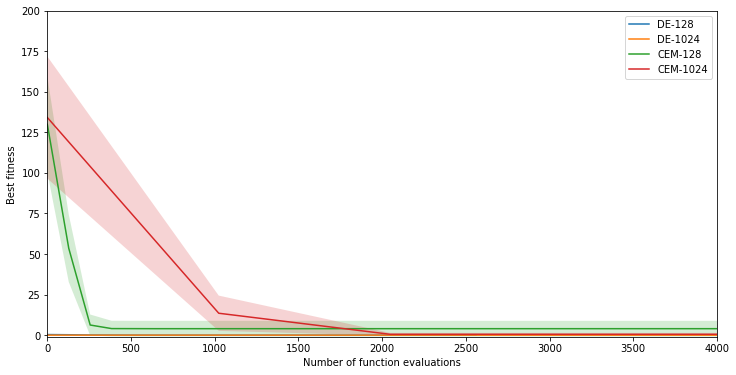

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 200)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-2d.png')
plt.show()

Dimension = 10

In [ ]:
# DE, dimension = 10, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, dimension = 10, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
#CEM, dimension = 10, popsize = 128
dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
#CEM, dimension = 10, popsize = 1024
dimension = 10
max_evals = 1e6
fobj = Sphere
seed_number = 19522274
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

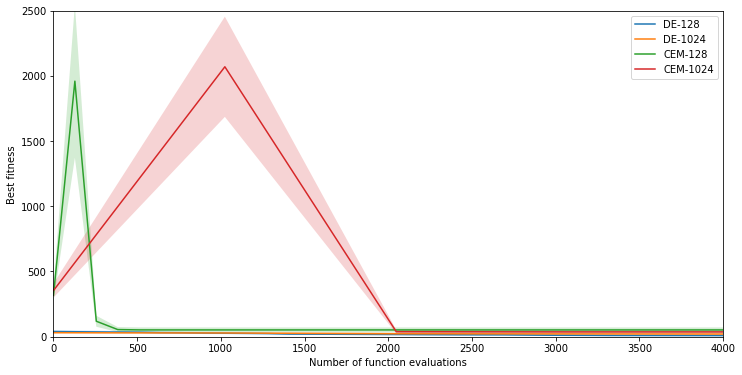

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 2500)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)
'''
plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-10d.png')
plt.show()
'''
# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-10d.png')
plt.show()

##Hàm Zakharov

Dimension = 2

In [ ]:
# DE, dimension = 2, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
popsize = 128
lower_bound = -5
upper_bound = 10

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, dimension = 2, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
popsize = 1024
lower_bound = -5
upper_bound = 10

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
#CEM, dimension = 2, popsize = 128
dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
popsize = 128
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
#CEM, dimension = 2, popsize = 1024
dimension = 2
max_evals = 1e5
fobj = Zakharov
seed_number = 19522274
popsize = 1024
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

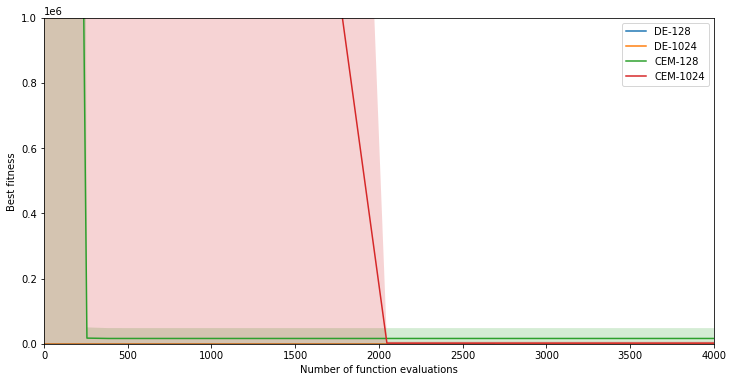

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 1e6)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Zakharov-2d.png')
plt.show()

Dimension = 10

In [ ]:
# DE, dimension = 10, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
popsize = 128
lower_bound = -5
upper_bound = 10

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, dimension = 10, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
popsize = 1024
lower_bound = -5
upper_bound = 10

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
#CEM, dimension = 10, popsize = 128
dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
popsize = 128
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
#CEM, dimension = 10, popsize = 1024
dimension = 10
max_evals = 1e6
fobj = Zakharov
seed_number = 19522274
popsize = 1024
lower_bound = -5
upper_bound = 10
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

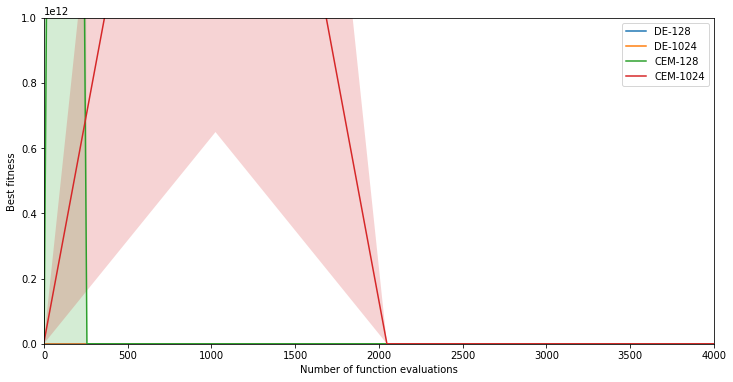

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 1e12)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Zakharov-10d.png')
plt.show()

##Hàm Rosenbrock

In [5]:
# DE, dimension = 2, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
popsize = 128
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [6]:
# DE, dimension = 2, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
popsize = 1024
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [7]:
#CEM, dimension = 2, popsize = 128
dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [8]:
#CEM, dimension = 2, popsize = 1024
dimension = 2
max_evals = 1e5
fobj = Rosenbrock
seed_number = 19522274
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

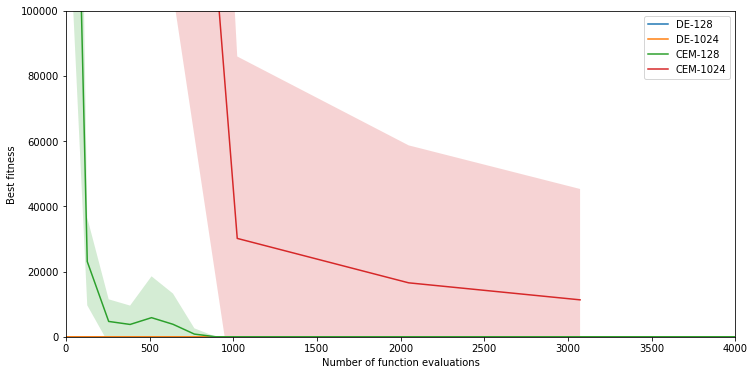

In [11]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 1e5)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-2d.png')
plt.show()

In [16]:
# DE, dimension = 10, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
popsize = 128
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [17]:
# DE, dimension = 10, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
popsize = 1024
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [18]:
#CEM, dimension = 10, popsize = 128
dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [19]:
#CEM, dimension = 10, popsize = 1024
dimension = 10
max_evals = 1e6
fobj = Rosenbrock
seed_number = 19522274
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

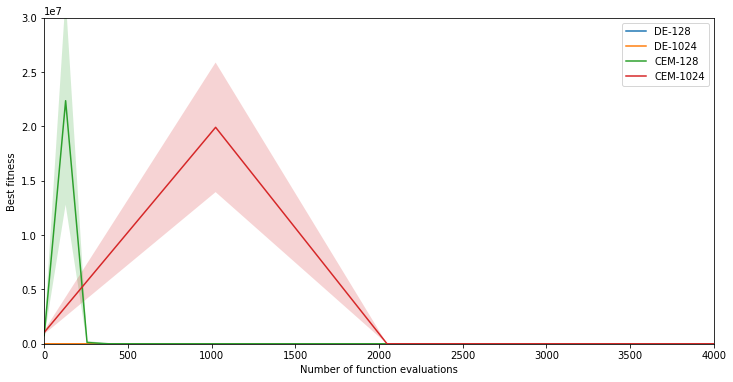

In [25]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 3e7)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-10d.png')
plt.show()

##Hàm Michalewicz

In [40]:
# DE, dimension = 2, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
popsize = 128
lower_bound = 0
upper_bound = np.pi

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [41]:
# DE, dimension = 2, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
popsize = 1024
lower_bound = 0
upper_bound = np.pi

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [42]:
#CEM, dimension = 2, popsize = 128
dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
popsize = 128
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [43]:
#CEM, dimension = 2, popsize = 1024
dimension = 2
max_evals = 1e5
fobj = Michalewicz
seed_number = 19522274
popsize = 1024
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

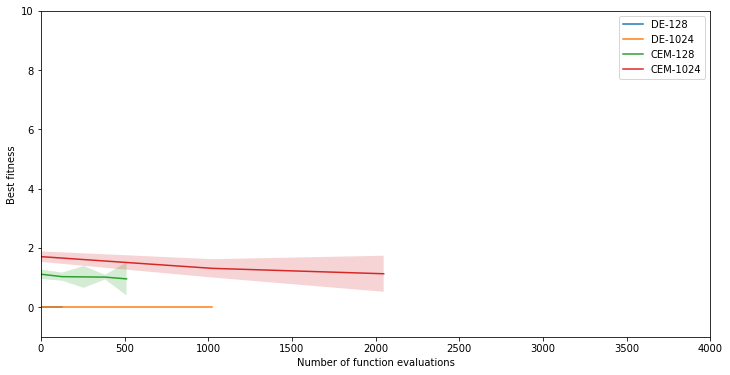

In [44]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 30)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Michalewicz-2d.png')
plt.show()

In [33]:
# DE, dimension = 10, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
popsize = 128
lower_bound = 0
upper_bound = np.pi

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [34]:
# DE, dimension = 10, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
popsize = 1024
lower_bound = 0
upper_bound = np.pi

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [35]:
#CEM, dimension = 10, popsize = 128
dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
popsize = 128
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sin


In [36]:
#CEM, dimension = 10, popsize = 1024
dimension = 10
max_evals = 1e6
fobj = Michalewicz
seed_number = 19522274
popsize = 1024
lower_bound = 0
upper_bound = np.pi
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sin


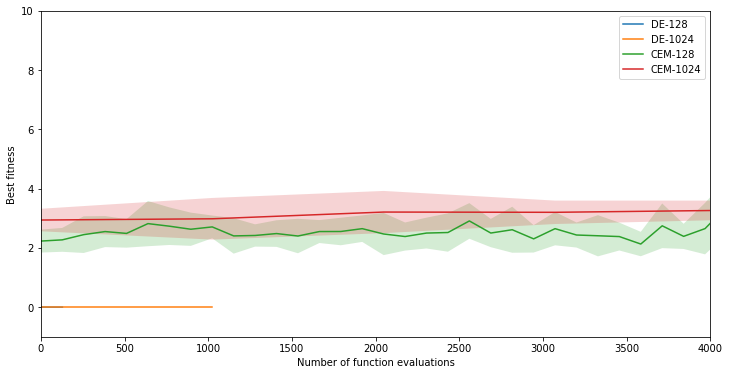

In [39]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 30)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Michalewicz-10d.png')
plt.show()

##Hàm Ackley

In [45]:
# DE, dimension = 2, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
popsize = 128
lower_bound = -33
upper_bound = 33

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [46]:
# DE, dimension = 2, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
popsize = 1024
lower_bound = -33
upper_bound = 33

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [47]:
#CEM, dimension = 2, popsize = 128
dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [48]:
#CEM, dimension = 2, popsize = 1024
dimension = 2
max_evals = 1e5
fobj = Ackley
seed_number = 19522274
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

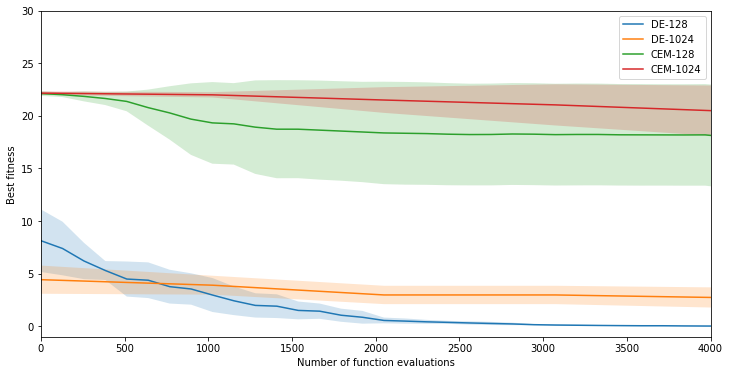

In [52]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 30)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-2d.png')
plt.show()

In [53]:
# DE, dimension = 10, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
popsize = 128
lower_bound = -33
upper_bound = 33

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [54]:
# DE, dimension = 10, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
popsize = 1024
lower_bound = -33
upper_bound = 33

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [55]:
#CEM, dimension = 10, popsize = 128
dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [56]:
#CEM, dimension = 10, popsize = 1024
dimension = 10
max_evals = 1e6
fobj = Ackley
seed_number = 19522274
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

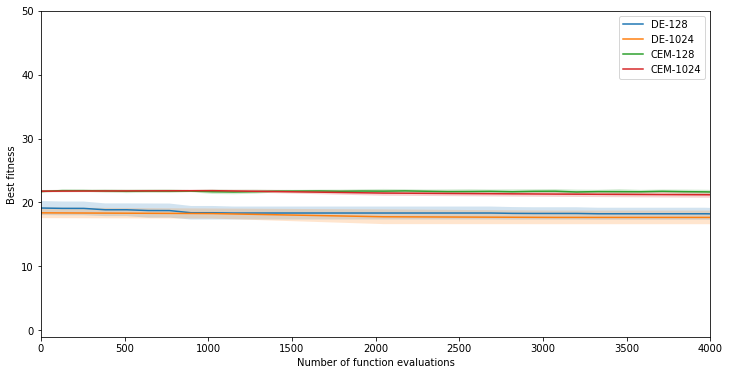

In [57]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 50)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-10d.png')
plt.show()